https://docs.dask.org/en/stable/10-minutes-to-dask.html

# Libraries 

In [44]:
import numpy as np
import pandas as pd

import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
from dask.distributed import Client

# Client

In [2]:
client = Client()
client

/Users/jeera/mlops-stack-to-try/env/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51191 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:51191/status,
Dashboard: http://127.0.0.1:51191/status,Workers: 4
Total threads: 8,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:51192,Workers: 4
Dashboard: http://127.0.0.1:51191/status,Total threads: 8
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:51203,Total threads: 2
Dashboard: http://127.0.0.1:51206/status,Memory: 2.00 GiB
Nanny: tcp://127.0.0.1:51195,


In [42]:
client.dashboard_link

'http://127.0.0.1:51191/status'

# Dask DataFrame 

In [3]:
index = pd.date_range("2021-09-01", periods=1000, freq="1H")
df = pd.DataFrame({"a": np.arange(1000), "b": list("abcaddbefg" * 100)}, index=index)
ddf = dd.from_pandas(df, npartitions=10)
ddf

,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,object
2021-09-05 04:00:00,...,...
...,...,...
2021-10-08 12:00:00,...,...
2021-10-12 15:00:00,...,...


In [4]:
ddf.divisions

(Timestamp('2021-09-01 00:00:00', freq='H'),
 Timestamp('2021-09-05 04:00:00', freq='H'),
 Timestamp('2021-09-09 08:00:00', freq='H'),
 Timestamp('2021-09-13 12:00:00', freq='H'),
 Timestamp('2021-09-17 16:00:00', freq='H'),
 Timestamp('2021-09-21 20:00:00', freq='H'),
 Timestamp('2021-09-26 00:00:00', freq='H'),
 Timestamp('2021-09-30 04:00:00', freq='H'),
 Timestamp('2021-10-04 08:00:00', freq='H'),
 Timestamp('2021-10-08 12:00:00', freq='H'),
 Timestamp('2021-10-12 15:00:00', freq='H'))

In [5]:
len(ddf.divisions)

11

In [6]:
ddf.partitions[1]

,a,b
npartitions=1,,
2021-09-05 04:00:00,int64,object
2021-09-09 08:00:00,...,...


In [7]:
ddf["b"]

Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    object
2021-09-05 04:00:00       ...
                        ...  
2021-10-08 12:00:00       ...
2021-10-12 15:00:00       ...
Name: b, dtype: object
Dask Name: getitem, 2 graph layers

In [8]:
ddf["2021-09-01":"2021-10-01"]

,a,b
npartitions=8,,
2021-09-01 00:00:00.000000000,int64,object
2021-09-05 04:00:00.000000000,...,...
...,...,...
2021-09-30 04:00:00.000000000,...,...
2021-10-01 23:59:59.999999999,...,...


In [9]:
ddf["2021-09-01":"2021-10-01"].compute()

,a,b
2021-09-01 00:00:00,0,a
2021-09-01 01:00:00,1,b
2021-09-01 02:00:00,2,c
2021-09-01 03:00:00,3,a
2021-09-01 04:00:00,4,d
...,...,...
2021-10-01 19:00:00,739,g
2021-10-01 20:00:00,740,a
2021-10-01 21:00:00,741,b
2021-10-01 22:00:00,742,c


In [10]:
ddf["a"].mean().compute()

499.5

In [11]:
ddf["b"].unique().compute()

0    a
1    b
2    c
3    d
4    e
5    f
6    g
Name: b, dtype: object

In [12]:
result = ddf["a"].mean() * 100

In [13]:
result

dd.Scalar<mul-f65..., dtype=float64>

In [14]:
result.compute()

49950.0

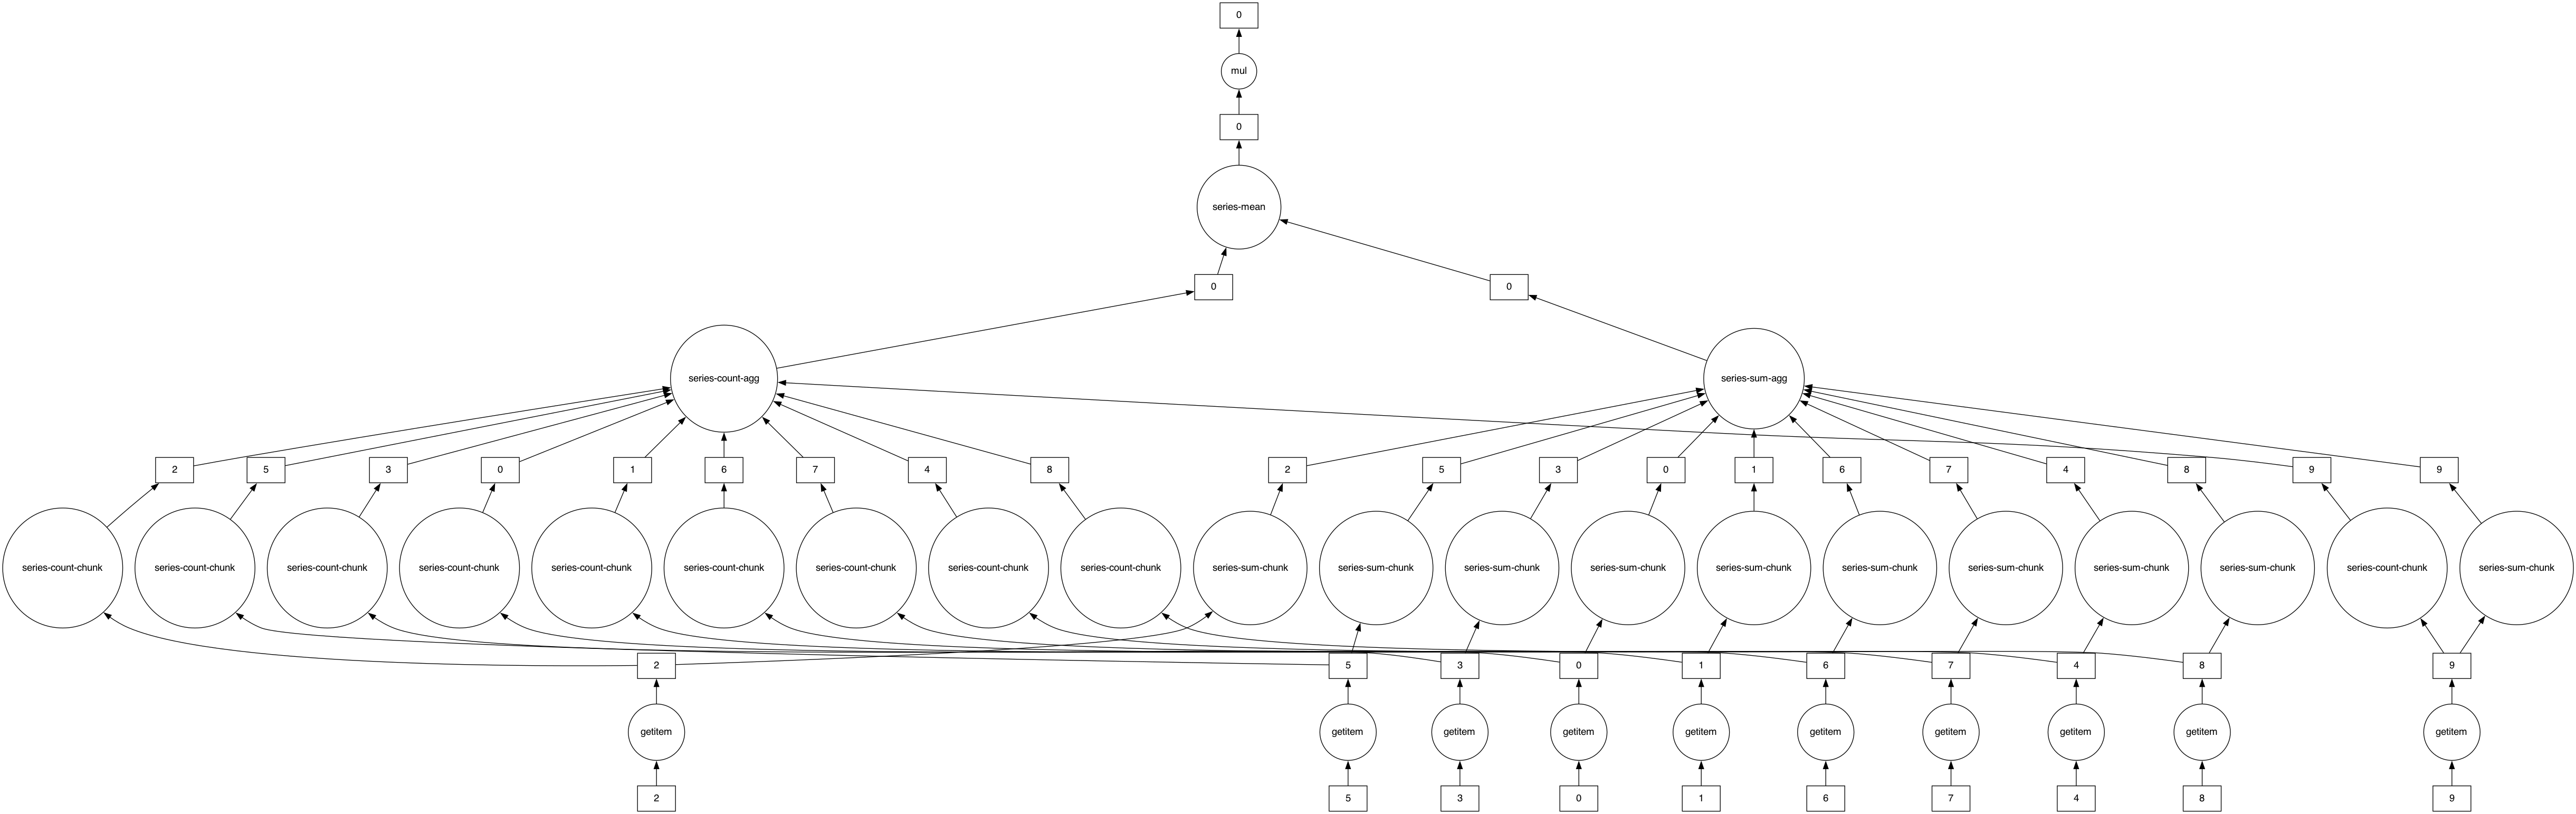

In [15]:
result.visualize()

# Dask Array 

In [16]:
data = np.arange(100_000).reshape(200, 500)
a = da.from_array(data, chunks=(100, 100))

In [17]:
a

dask.array<array, shape=(200, 500), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [18]:
a.chunks

((100, 100), (100, 100, 100, 100, 100))

In [19]:
a.blocks[1, 3]

dask.array<blocks, shape=(100, 100), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [20]:
a[:50, 200]

dask.array<getitem, shape=(50,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [21]:
a[:50, 200].compute()

array([  200,   700,  1200,  1700,  2200,  2700,  3200,  3700,  4200,
        4700,  5200,  5700,  6200,  6700,  7200,  7700,  8200,  8700,
        9200,  9700, 10200, 10700, 11200, 11700, 12200, 12700, 13200,
       13700, 14200, 14700, 15200, 15700, 16200, 16700, 17200, 17700,
       18200, 18700, 19200, 19700, 20200, 20700, 21200, 21700, 22200,
       22700, 23200, 23700, 24200, 24700])

In [22]:
a.mean()

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [23]:
a.mean().compute()

49999.5

In [24]:
np.sin(a)

dask.array<sin, shape=(200, 500), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [25]:
np.sin(a).compute()

array([[ 0.        ,  0.84147098,  0.90929743, ...,  0.58781939,
         0.99834363,  0.49099533],
       [-0.46777181, -0.9964717 , -0.60902011, ..., -0.89796748,
        -0.85547315, -0.02646075],
       [ 0.82687954,  0.9199906 ,  0.16726654, ...,  0.99951642,
         0.51387502, -0.4442207 ],
       ...,
       [-0.99720859, -0.47596473,  0.48287891, ..., -0.76284376,
         0.13191447,  0.90539115],
       [ 0.84645538,  0.00929244, -0.83641393, ...,  0.37178568,
        -0.5802765 , -0.99883514],
       [-0.49906936,  0.45953849,  0.99564877, ...,  0.10563876,
         0.89383946,  0.86024828]])

In [26]:
a.T.compute()

array([[    0,   500,  1000, ..., 98500, 99000, 99500],
       [    1,   501,  1001, ..., 98501, 99001, 99501],
       [    2,   502,  1002, ..., 98502, 99002, 99502],
       ...,
       [  497,   997,  1497, ..., 98997, 99497, 99997],
       [  498,   998,  1498, ..., 98998, 99498, 99998],
       [  499,   999,  1499, ..., 98999, 99499, 99999]])

In [27]:
b = a.max(axis=1)[::-1] + 10

In [28]:
b

dask.array<add, shape=(200,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>

In [29]:
b.compute()

array([100009,  99509,  99009,  98509,  98009,  97509,  97009,  96509,
        96009,  95509,  95009,  94509,  94009,  93509,  93009,  92509,
        92009,  91509,  91009,  90509,  90009,  89509,  89009,  88509,
        88009,  87509,  87009,  86509,  86009,  85509,  85009,  84509,
        84009,  83509,  83009,  82509,  82009,  81509,  81009,  80509,
        80009,  79509,  79009,  78509,  78009,  77509,  77009,  76509,
        76009,  75509,  75009,  74509,  74009,  73509,  73009,  72509,
        72009,  71509,  71009,  70509,  70009,  69509,  69009,  68509,
        68009,  67509,  67009,  66509,  66009,  65509,  65009,  64509,
        64009,  63509,  63009,  62509,  62009,  61509,  61009,  60509,
        60009,  59509,  59009,  58509,  58009,  57509,  57009,  56509,
        56009,  55509,  55009,  54509,  54009,  53509,  53009,  52509,
        52009,  51509,  51009,  50509,  50009,  49509,  49009,  48509,
        48009,  47509,  47009,  46509,  46009,  45509,  45009,  44509,
      

In [30]:
b.dask

HighLevelGraph with 6 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7fea6828cbb0>
 0. array-5f1b3c0ca172b03296ed6d431d3c9df7
 1. chunk_max-22359f6e7c214a78df6cd2673d3d603f
 2. chunk_max-partial-1dbed0d768d7fbafb3cb682ddb58870a
 3. amax-aggregate-f94050a9bd8876b51c0d09825ac793c8
 4. getitem-025f8710b7fd9db8a9d07629455d3e1a
 5. add-edf7897f1db3089799c2ef91c0c476db

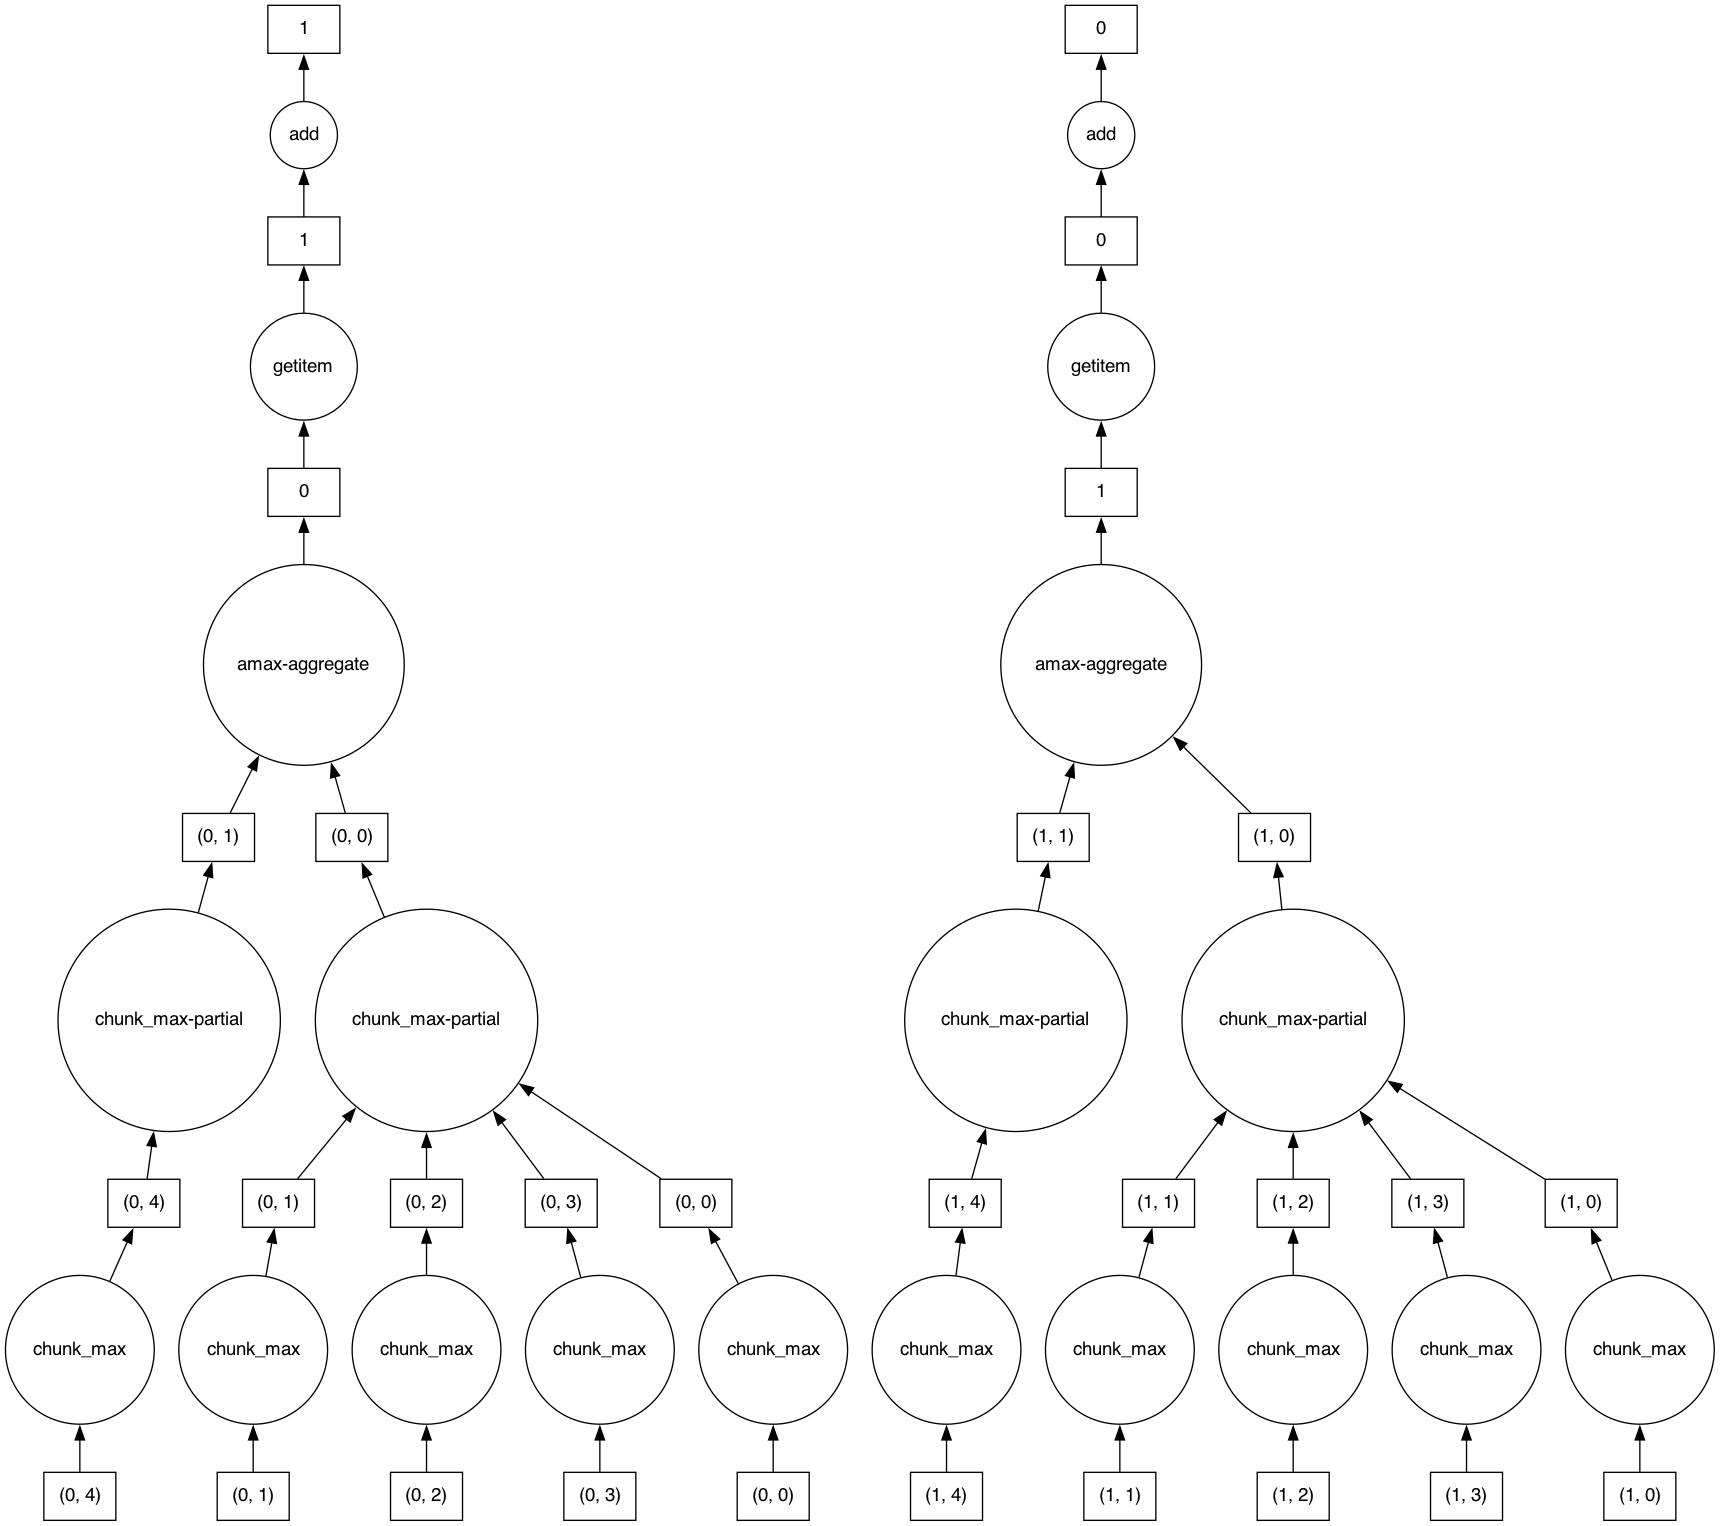

In [31]:
b.visualize()

# Dask Bag 

In [32]:
b = db.from_sequence([1, 2, 3, 4, 5, 6, 2, 1], npartitions=2)

A Bag is an unordered collection allowing repeats. So it is like a list, but it doesn’t guarantee an ordering among elements. There is no way to index Bags since they are not ordered.

In [33]:
b.compute()

[1, 2, 3, 4, 5, 6, 2, 1]

In [34]:
b.filter(lambda x: x % 2)

dask.bag<filter-lambda, npartitions=2>

In [35]:
b.filter(lambda x: x % 2).compute()

[1, 3, 5, 1]

In [36]:
b.distinct()

dask.bag<distinct-aggregate, npartitions=1>

In [37]:
b.distinct().compute()

[1, 2, 3, 4, 5, 6]

In [38]:
c = db.zip(b, b.map(lambda x: x * 10))

In [39]:
c.compute()

[(1, 10), (2, 20), (3, 30), (4, 40), (5, 50), (6, 60), (2, 20), (1, 10)]

In [40]:
c.dask

HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7fea78630ac0>
 0. from_sequence-cca2a33ba6e12645a0c9bc0fd3fe6c88
 1. lambda-c8cb63d843d9f5b9b852ebf5af70002a
 2. zip-491a17af4955f217d772f96d064437ed

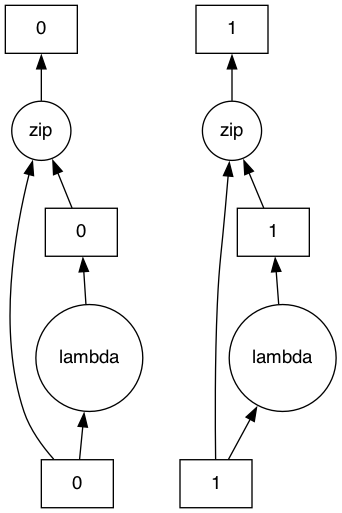

In [41]:
c.visualize()

# Dask Delayed 

In [45]:
@dask.delayed
def inc(x):
    return x + 1

@dask.delayed
def add(x, y):
    return x + y

a = inc(1)       # no work has happened yet
b = inc(2)       # no work has happened yet
c = add(a, b)    # no work has happened yet

In [46]:
c = c.compute()  # This triggers all of the above computations

In [47]:
c

5

# Dask Futures 

In [49]:
def inc(x):
    return x + 1

def add(x, y):
    return x + y

a = client.submit(inc, 1)     # work starts immediately
b = client.submit(inc, 2)     # work starts immediately
c = client.submit(add, a, b)  # work starts immediately

In [50]:
c = c.result()                # block until work finishes, then gather result

In [51]:
c

5